# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimise operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [6]:
# Import essential libraries for data manipulation and analysis
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [8]:
# Importing the file porter_data_1.csv
df = pd.read_csv(r'C:\Users\tahse\Downloads\30688323-a1ea-4809-83c4-91d8096236c8-Delivery-Starter\Delivery_Starter/porter_data_1.csv')
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [10]:
df.describe()

market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  
count  175777.000000  
mean       21.843090  
std         8.748712  
min         0.000000  
25%        15.360000  
50%        21.760000  
75%        28.120000  
max        83.520000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [15]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df.created_at = pd.to_datetime(df.created_at)
df.actual_delivery_time = pd.to_datetime(df.actual_delivery_time)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [18]:
# Convert categorical features to category type

df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')
df['market_id'] = df['market_id'].astype('category')

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [21]:
# Calculate time taken in minutes
df['time_taken'] = df['actual_delivery_time']-df['created_at']
df['time_taken'] = df['time_taken'].dt.total_seconds() / 60

In [22]:
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  
0                      21.0     34.44        47.0  
1                       2.0     27.60        44.0  
2                      18.0     11.56        55.0  
3                       8.0     31.80        59.0  
4                       7.0      8.20        46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [24]:
# Extract the hour and day of week from the 'created_at' timestamp
df['hour_of_order'] = df['created_at'].dt.hour

# Create a categorical feature 'isWeekend'
# df['day_name'] = df['created_at'].dt.day_name()
df['isWeekend'] = df['created_at'].dt.day_name().isin(['Saturday','Sunday']).astype(int).astype('category')
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  hour_of_order isWeekend  
0                      21.0     34.44        47.0             22         0  
1                       2.0     27.60        44.0             21         0  
2                      18.0     11.56        55.0              0         0  
3                       8.0     31.80        59.0              3         0  
4                       7.0      8.20        46.0              2         0

In [25]:
# Drop unnecessary columns

df1 = df.drop(columns=['created_at', 'actual_delivery_time', 
                      'min_item_price', 'max_item_price'])


In [26]:
df1.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  total_onshift_dashers  total_busy_dashers  \
0                   4                   33.0                14.0   
1                   1                    1.0                 2.0   
2                   3                    8.0                 6.0   
3                   1                    5.0                 6.0   
4                   2                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  hour_of_order isWeekend  
0                      21.0     34.44        47.0             22         0  
1                       2.0     27.60        44.0             21         0  
2                      18.0     11.56        55.0              0         0  
3                       8.0     31.80        59.0              3         0  
4                       7.0      8.20        46.0              2         0

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [29]:
# Define target variable (y) and features (X)

y = df1.pop('time_taken')
X = df1

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [31]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, test_size = .2, random_state = 100)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140621, 12)
(35156, 12)
(140621,)
(35156,)


## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [35]:
# Define numerical and categorical columns for easy EDA and data manipulation
cat_var = ['market_id','store_primary_category','order_protocol','hour_of_order','isWeekend']
num_var = ['total_items','subtotal','num_distinct_items','total_onshift_dashers','total_busy_dashers','total_outstanding_orders','distance']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

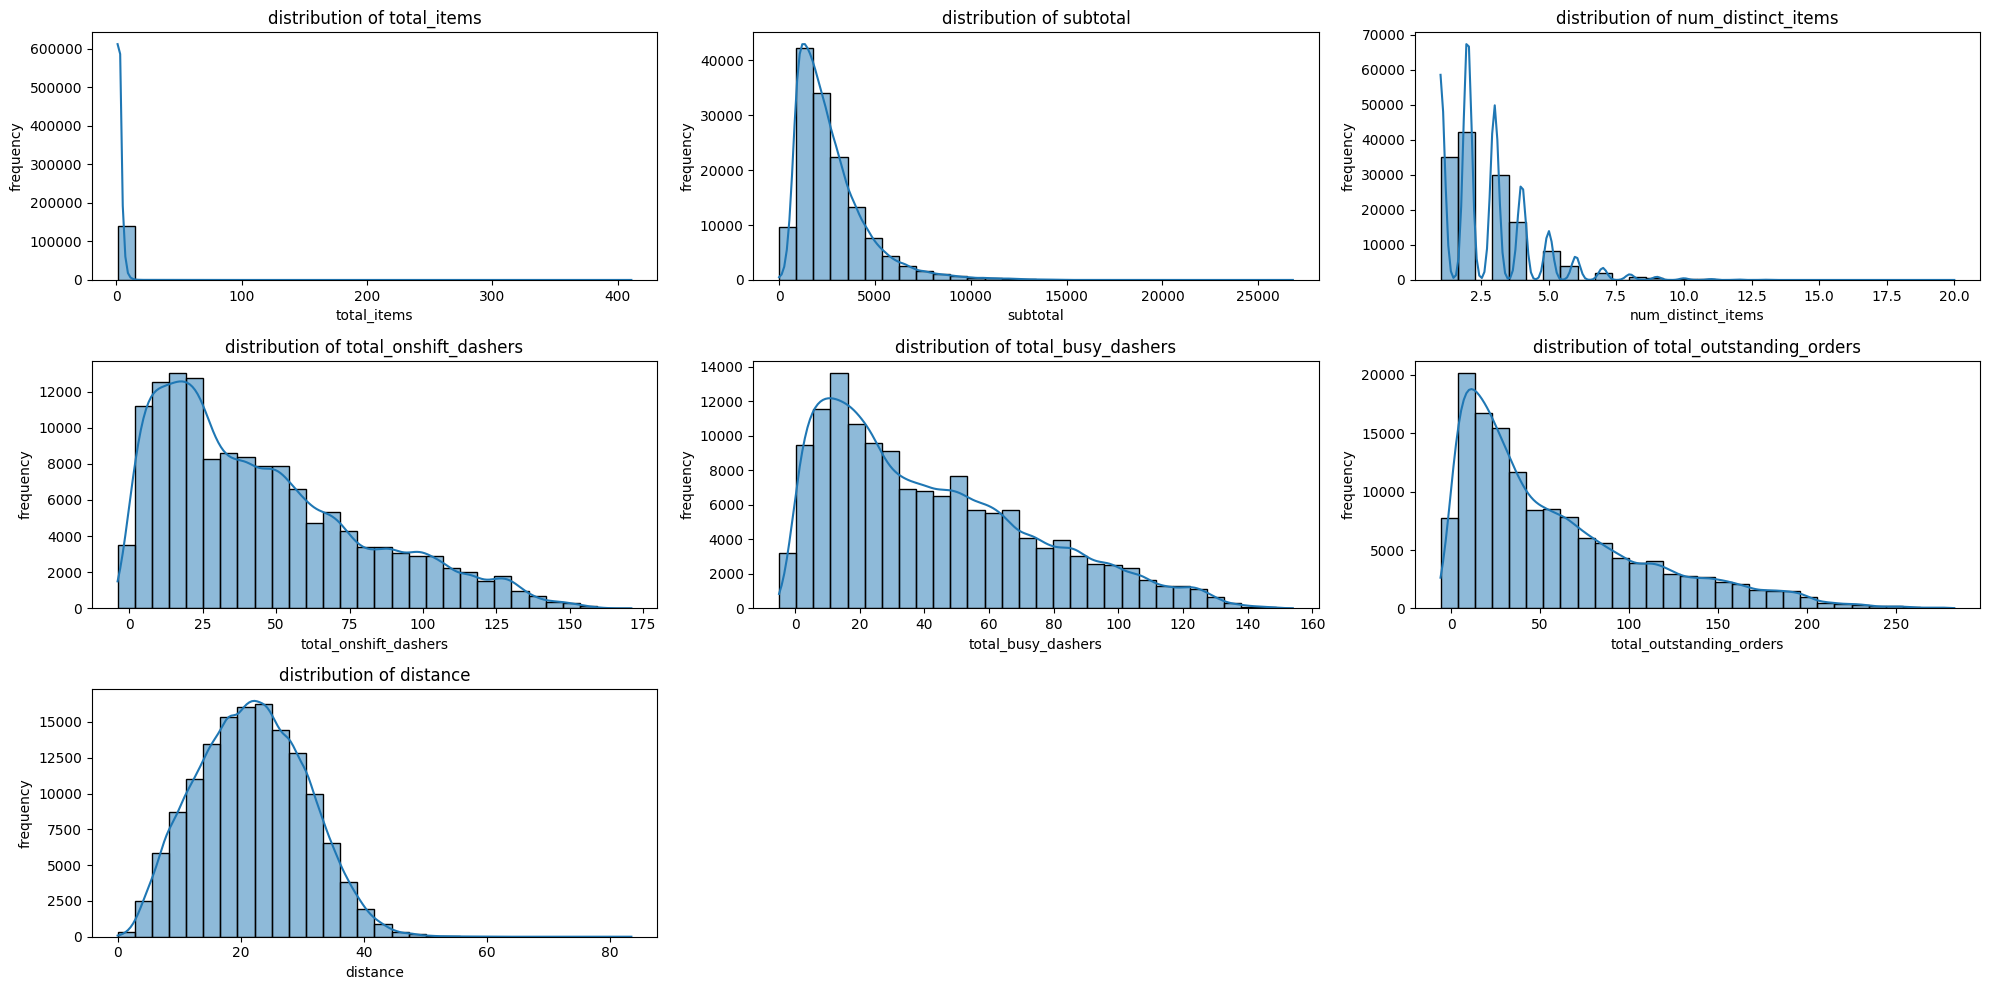

In [37]:
# Plot distributions for all numerical columns
plt.figure(figsize = (20,10))
for i, col in enumerate(num_var, 1):
    plt.subplot(3,3,i)
    sns.histplot(X_train[col], kde = True, bins = 30)
    plt.title(f'distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [39]:
# Distribution of categorical columns
# using countplot instead of hist plot in cat variables gives better picture

plt.figure(figsize = (30,20))
for i, col in enumerate(cat_var, 1):
    plt.subplot(3,3,i)
    sns.countplot(data=X_train, x=col, palette='Blues')
    plt.title(f'distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

In [41]:
# Distribution of time_taken

sns.histplot(y_train, kde = True, bins = 30)
plt.title('Distribution of Time taken')
plt.xlabel('Time taken')
plt.ylabel('frequency')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

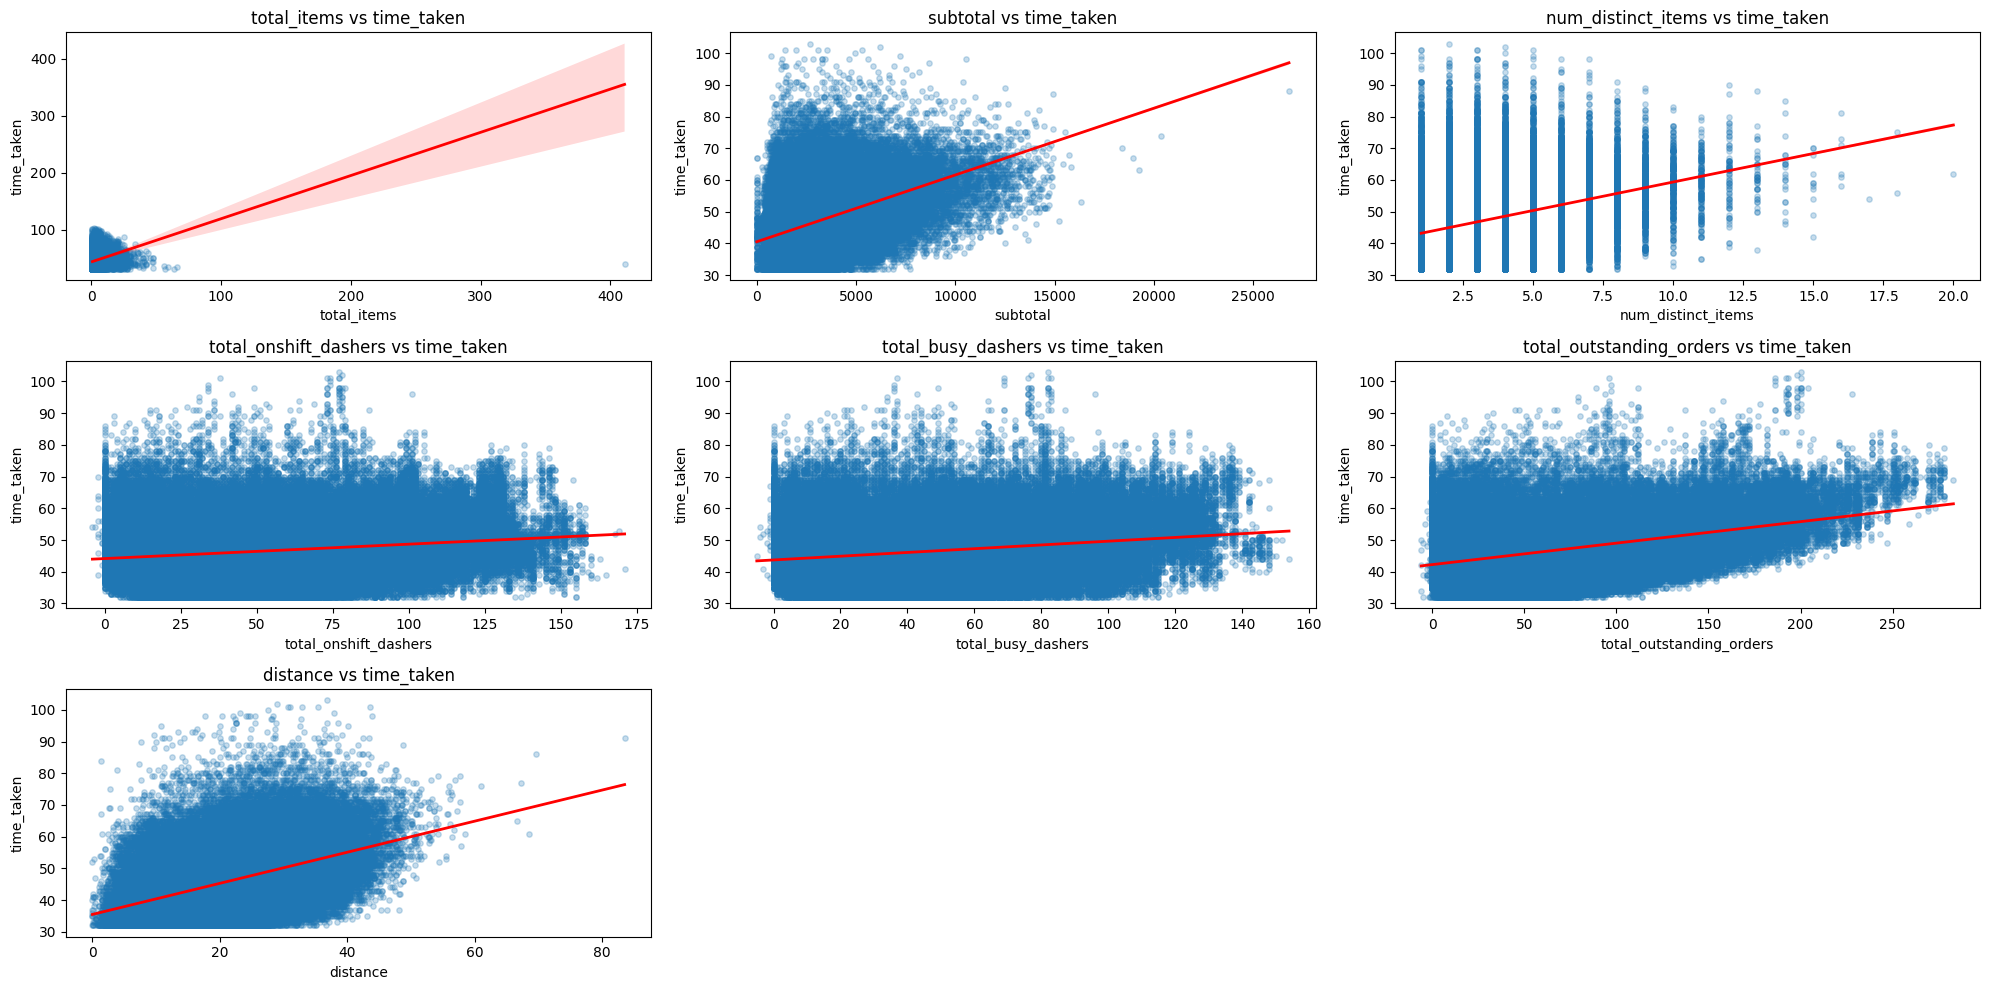

In [44]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize = (20,10))
for i, col in enumerate(num_var, 1):
    plt.subplot(3,3,i)
    # sns.scatterplot(x = X_train[col],y = y_train)
    sns.regplot(x = X_train[col], y = y_train, scatter_kws = {'alpha': 0.25, 's': 15},
               line_kws={'color': 'red', 'linewidth': 2})
    plt.title(f'{col} vs time_taken')
    plt.xlabel(col)
    plt.ylabel('time_taken')
plt.tight_layout()
plt.show()

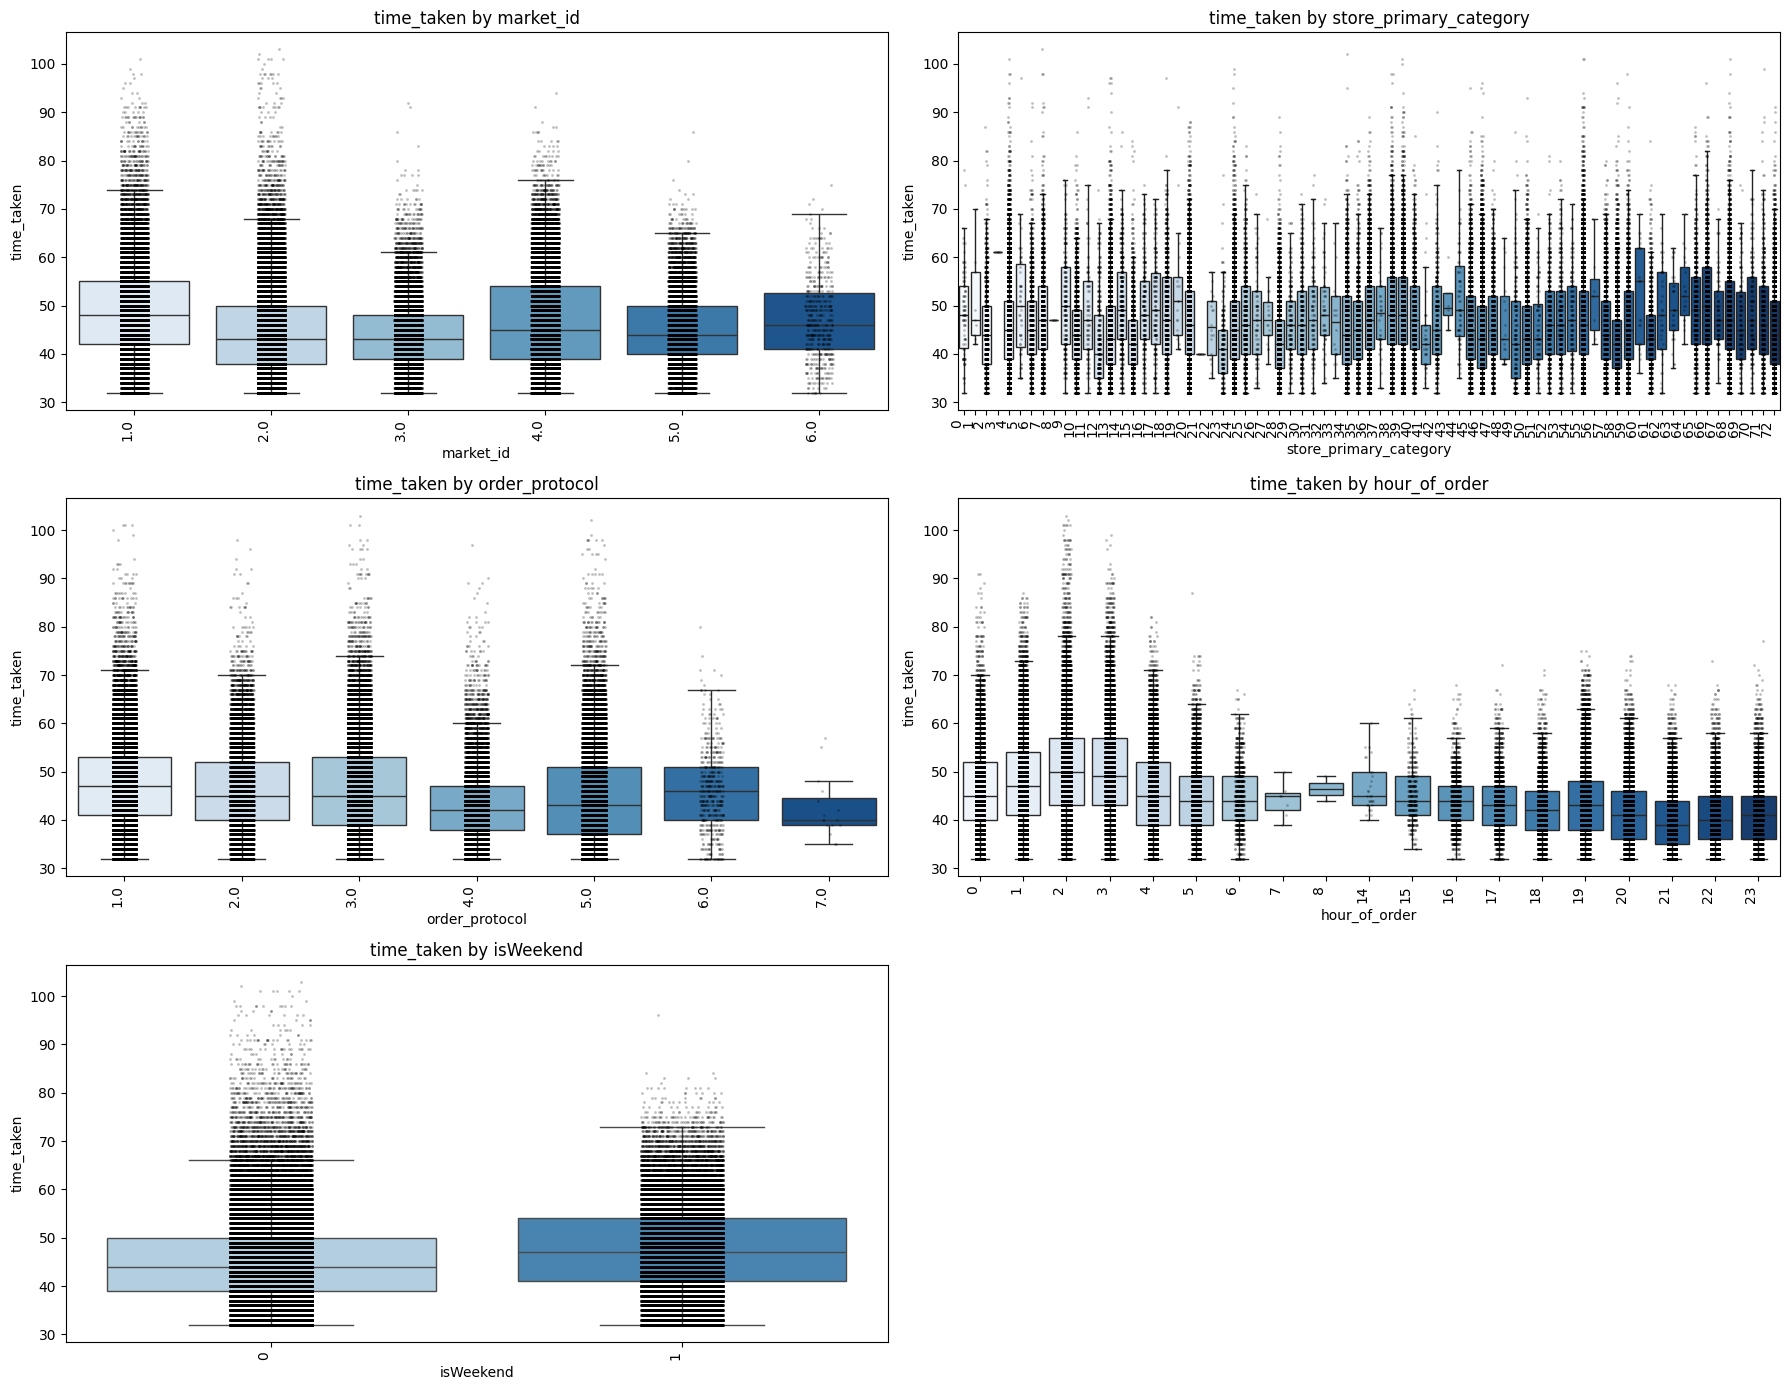

In [45]:
# for categorical variables
plt.figure(figsize=(18, 14))
for i, col in enumerate(cat_var, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=X_train[col], y=y_train, showfliers=False, palette='Blues')
    
    # jittered points for extra insight
    sns.stripplot(x=X_train[col], y=y_train, alpha=0.25, color='black', size=2)
    
    plt.title(f'time_taken by {col}')
    plt.xlabel(col)
    plt.ylabel('time_taken')
    plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()


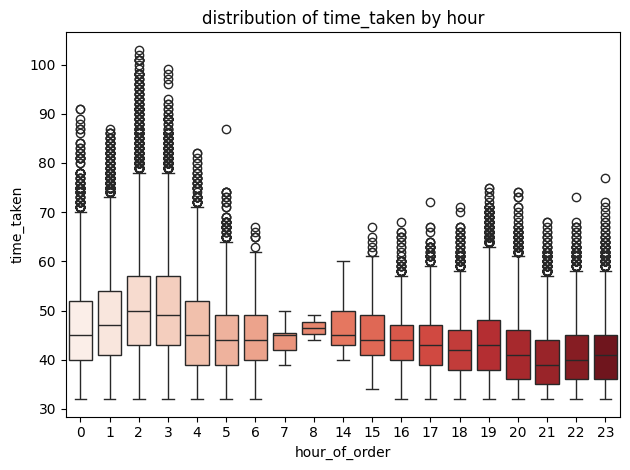

In [46]:
# Show the distribution of time_taken for different hours

sns.boxplot(x=X_train['hour_of_order'], y=y_train, palette='Reds')
plt.title(f'distribution of time_taken by hour')
plt.xlabel('hour_of_order')
plt.ylabel('time_taken')
plt.tight_layout()
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [49]:
# Plot the heatmap of the correlation matrix
corr_matrix = X_train.copy()
corr_matrix['time_taken'] = y_train


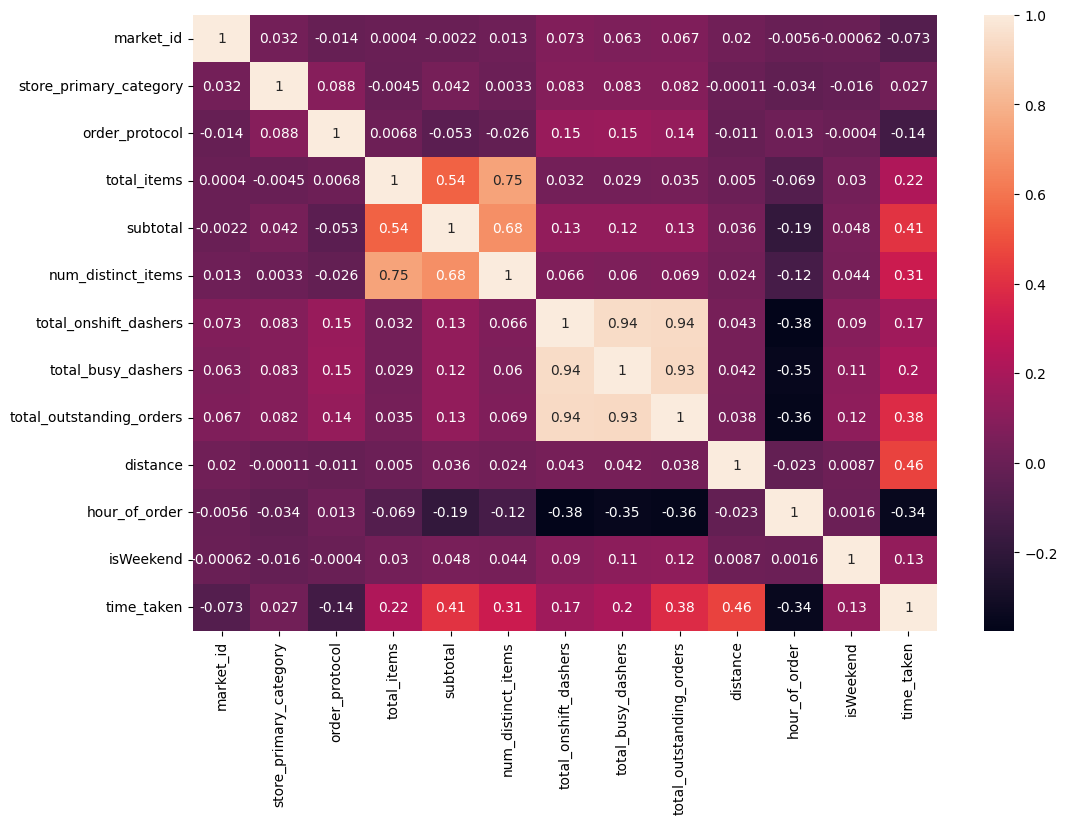

In [50]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix.corr(),annot = True)
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [52]:
# Drop 3-5 weakly correlated columns from training dataset

weak_col = ['market_id', 'store_primary_category','order_protocol']
X_train = X_train.drop(columns = weak_col)
# X_test = X_test.drop(columns = weak_col)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [55]:
# Boxplot for time_taken

train_box = X_train[num_var].copy()
train_box['time_taken'] = y_train

In [56]:
train_box.head()

total_items  subtotal  num_distinct_items  total_onshift_dashers  \
42111             1      1350                   1                   23.0   
58452             5      4285                   5                  112.0   
20644             6      7880                   3                   80.0   
79735             3      3660                   3                  127.0   
167933            5      8575                   5                   44.0   

        total_busy_dashers  total_outstanding_orders  distance  time_taken  
42111                 20.0                      19.0      9.60        32.0  
58452                100.0                     207.0     34.56        71.0  
20644                 79.0                     115.0     34.92        62.0  
79735                106.0                     173.0     25.76        54.0  
167933                44.0                      61.0     17.72        56.0

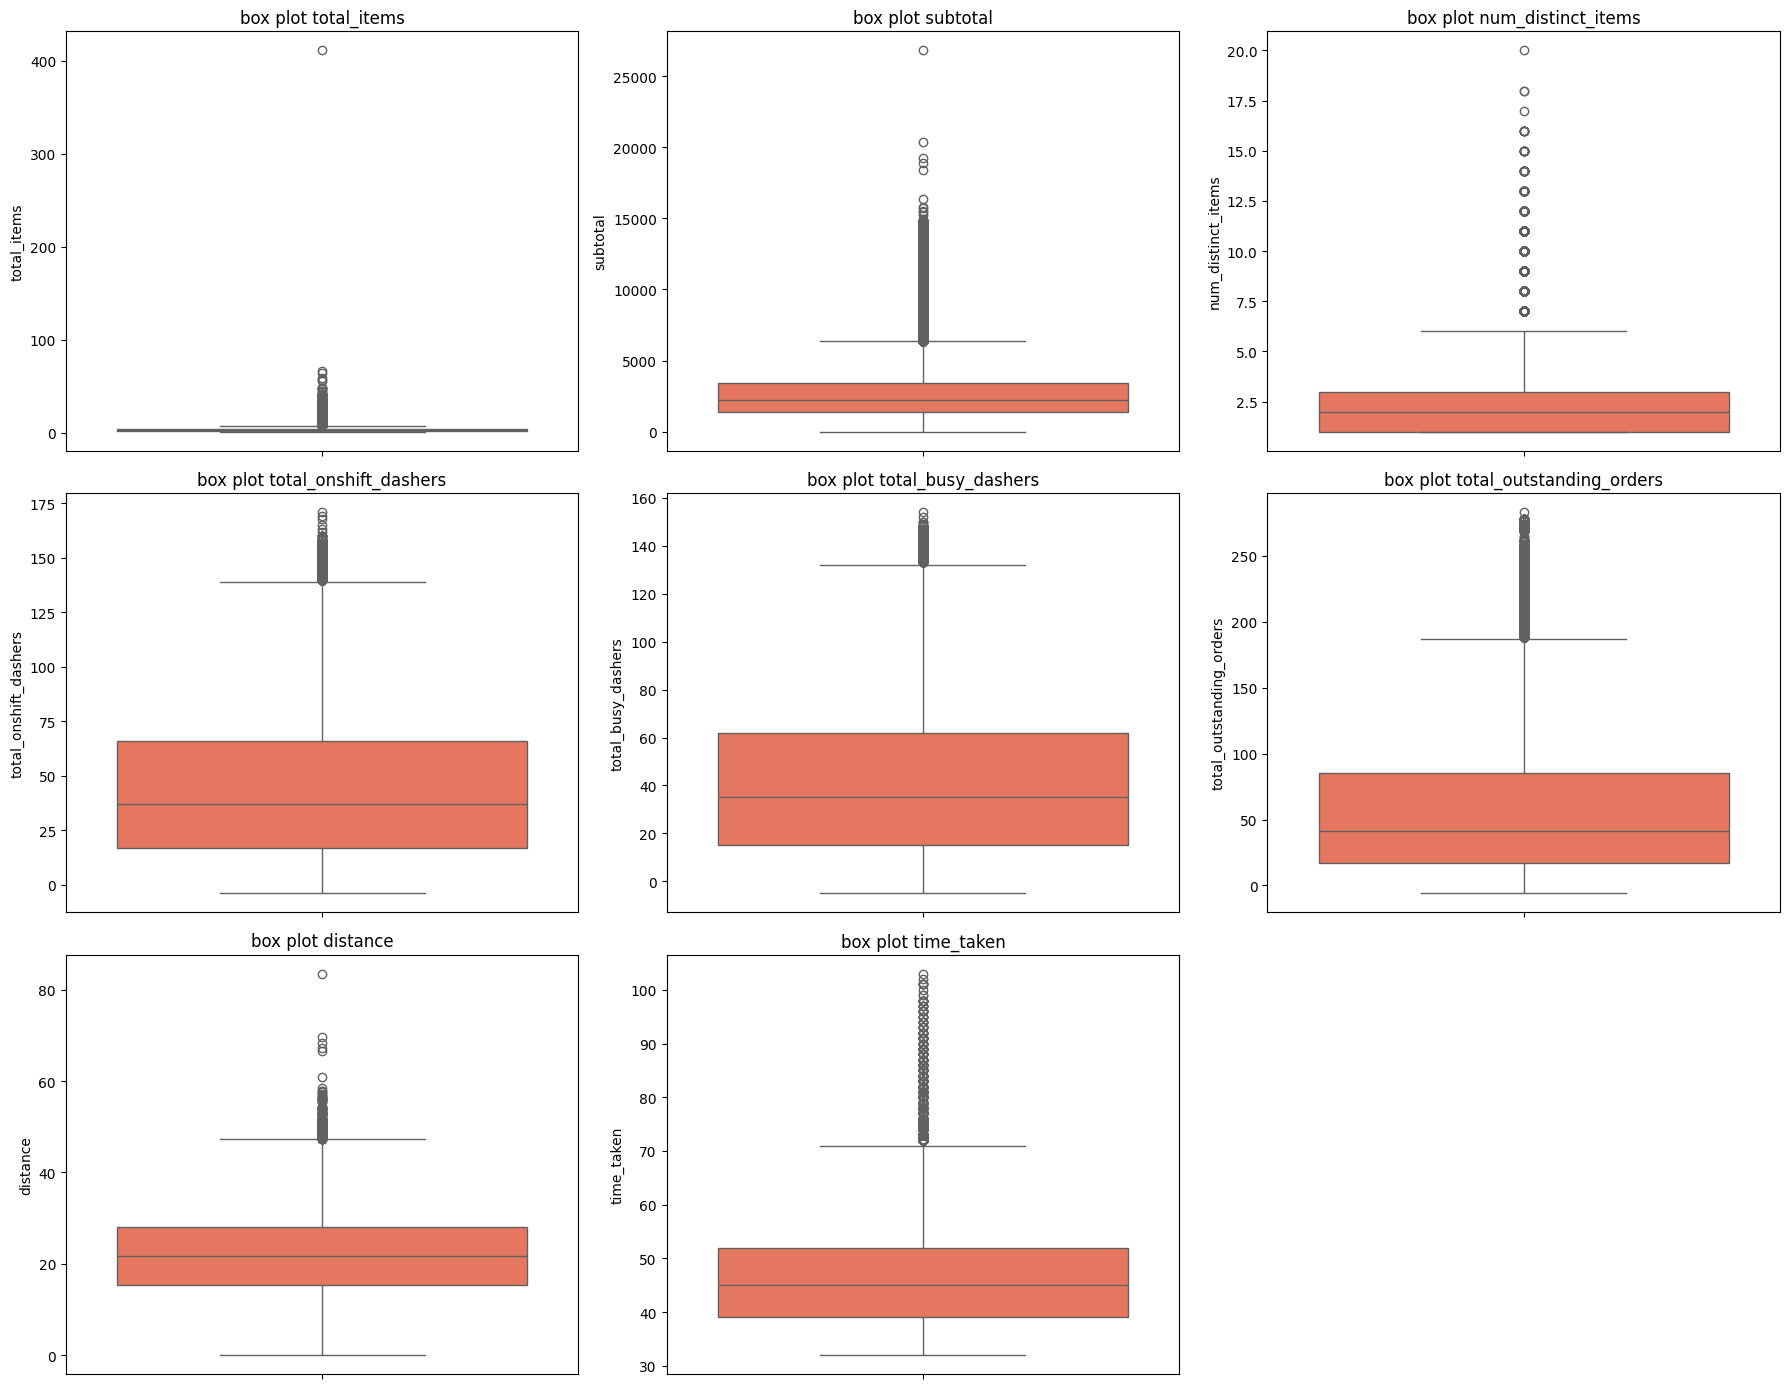

In [57]:
plt.figure(figsize=(18, 14))
for i, col in enumerate(train_box.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(train_box[col], palette='Reds')
    plt.title(f'box plot {col}')
    plt.xlabel('')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [59]:
# Handle outliers
col_outlier = (['total_items','subtotal','num_distinct_items','total_onshift_dashers','total_busy_dashers',
               'total_outstanding_orders','distance'])

upper_cap = {col: X_train[col].quantile(.99) for col in col_outlier}
upper_cap

{'total_items': np.float64(12.0),
 'subtotal': np.float64(9489.199999999953),
 'num_distinct_items': np.float64(8.0),
 'total_onshift_dashers': np.float64(136.0),
 'total_busy_dashers': np.float64(126.0),
 'total_outstanding_orders': np.float64(213.0),
 'distance': np.float64(41.84)}

In [60]:
for col, upper in upper_cap.items():
    X_train[col] = X_train[col].clip(upper=upper)
X_train.describe()

total_items       subtotal  num_distinct_items  \
count  140621.000000  140621.000000       140621.000000   
mean        3.149295    2679.578914            2.656943   
std         2.151987    1748.937004            1.552343   
min         1.000000       0.000000            1.000000   
25%         2.000000    1415.000000            1.000000   
50%         3.000000    2220.000000            2.000000   
75%         4.000000    3407.000000            3.000000   
max        12.000000    9489.200000            8.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          140621.000000       140621.000000             140621.000000   
mean               44.866058           41.792172                 58.016726   
std                34.327508           31.969860                 51.966568   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           62.000000                 85.000000   
max               136.000000          126.000000                213.000000   

            distance  hour_of_order  
count  140621.000000  140621.000000  
mean       21.802641       8.473365  
std         8.668611       8.676889  
min         0.000000       0.000000  
25%        15.320000       2.000000  
50%        21.760000       3.000000  
75%        28.120000      19.000000  
max        41.840000      23.000000

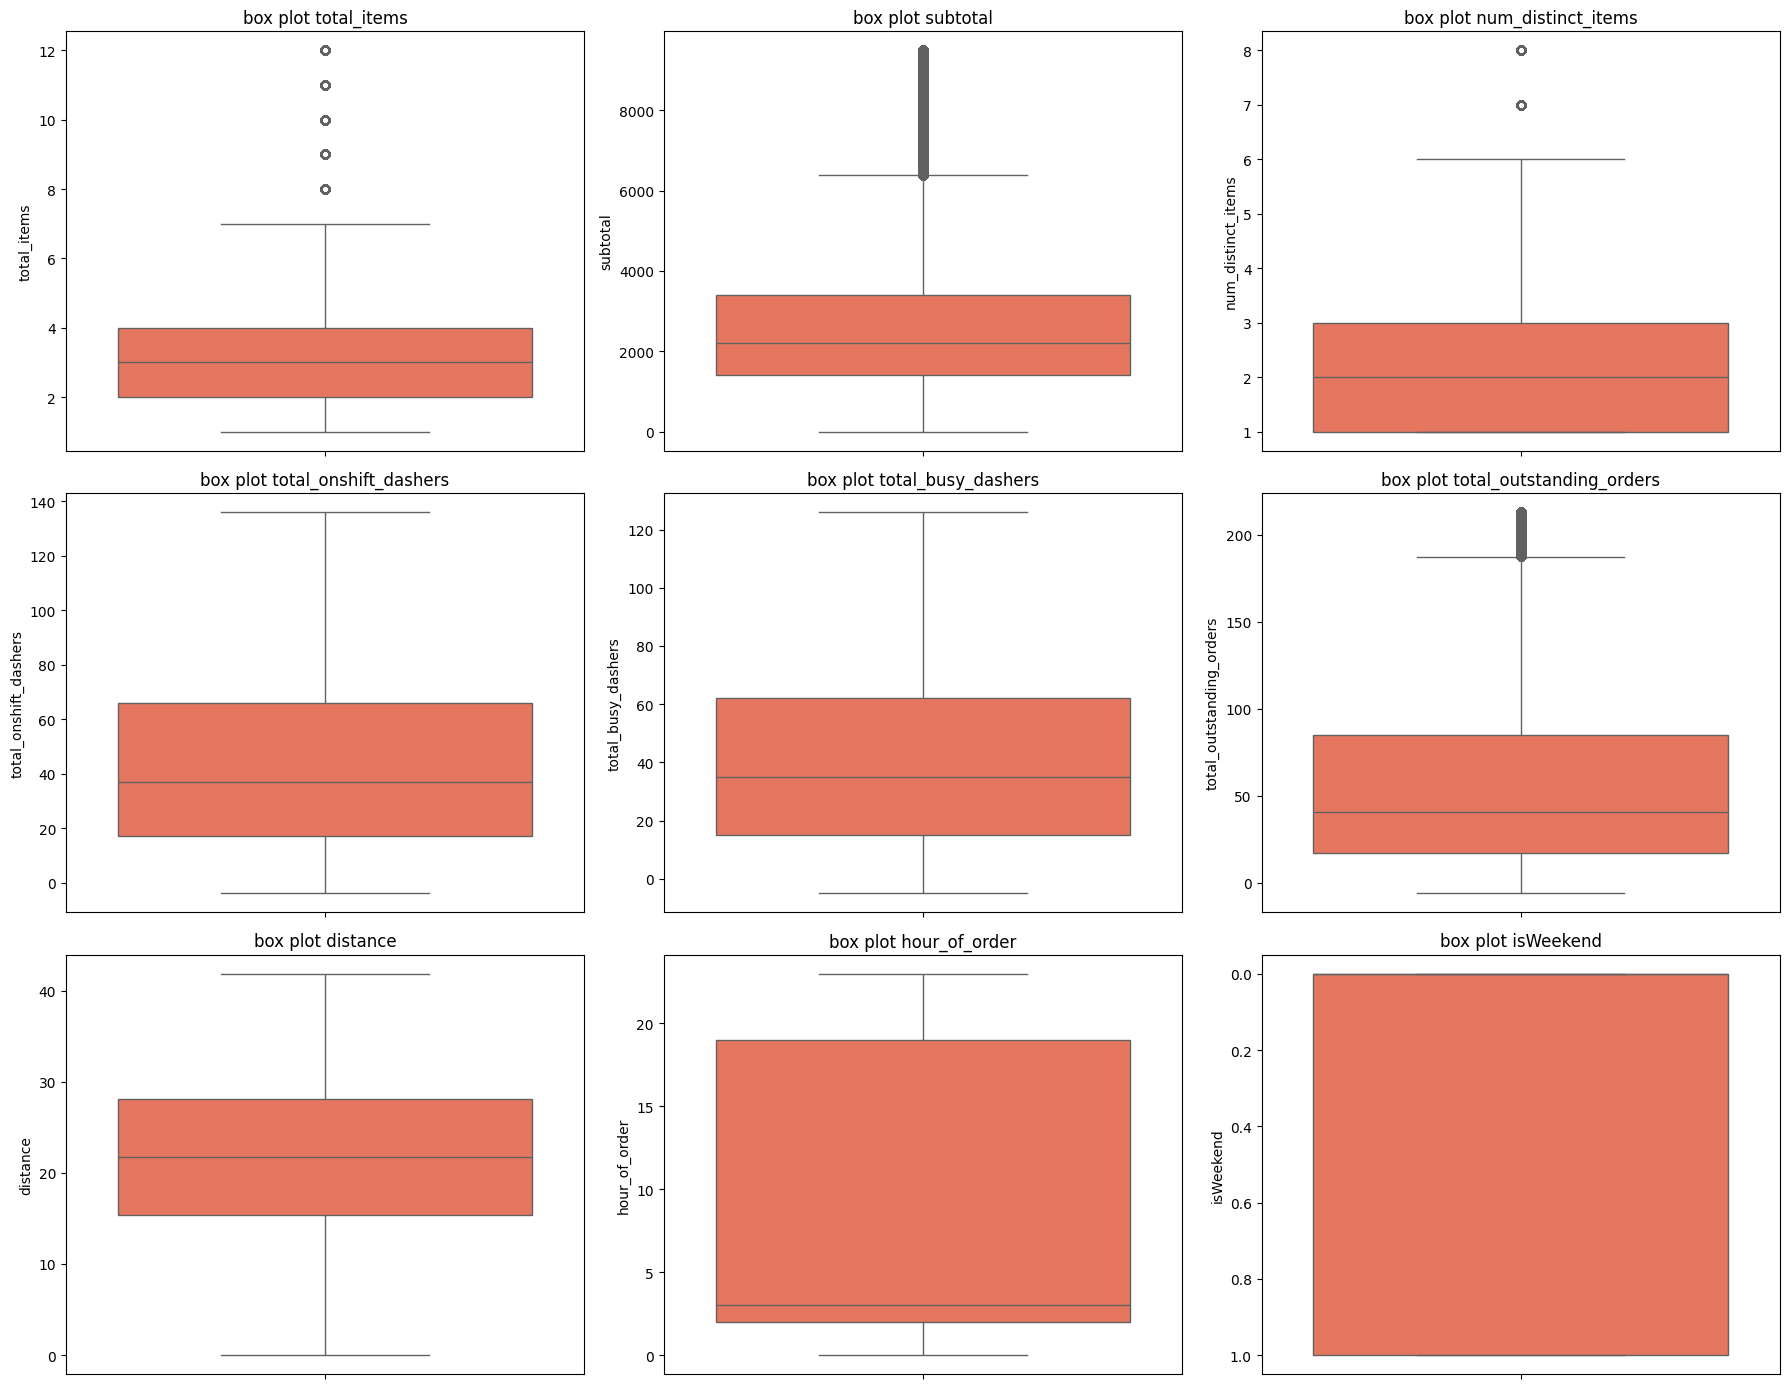

In [61]:
# checking after handelling outliers
plt.figure(figsize=(18, 14))
for i, col in enumerate(X_train.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(X_train[col], palette='Reds')
    plt.title(f'box plot {col}')
    plt.xlabel('')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [63]:
# Define numerical and categorical columns for easy EDA and data manipulation

cat_var = ['market_id','store_primary_category','order_protocol','hour_of_order','isWeekend']
num_var = ['total_items','subtotal','num_distinct_items','total_onshift_dashers','total_busy_dashers','total_outstanding_orders','distance']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

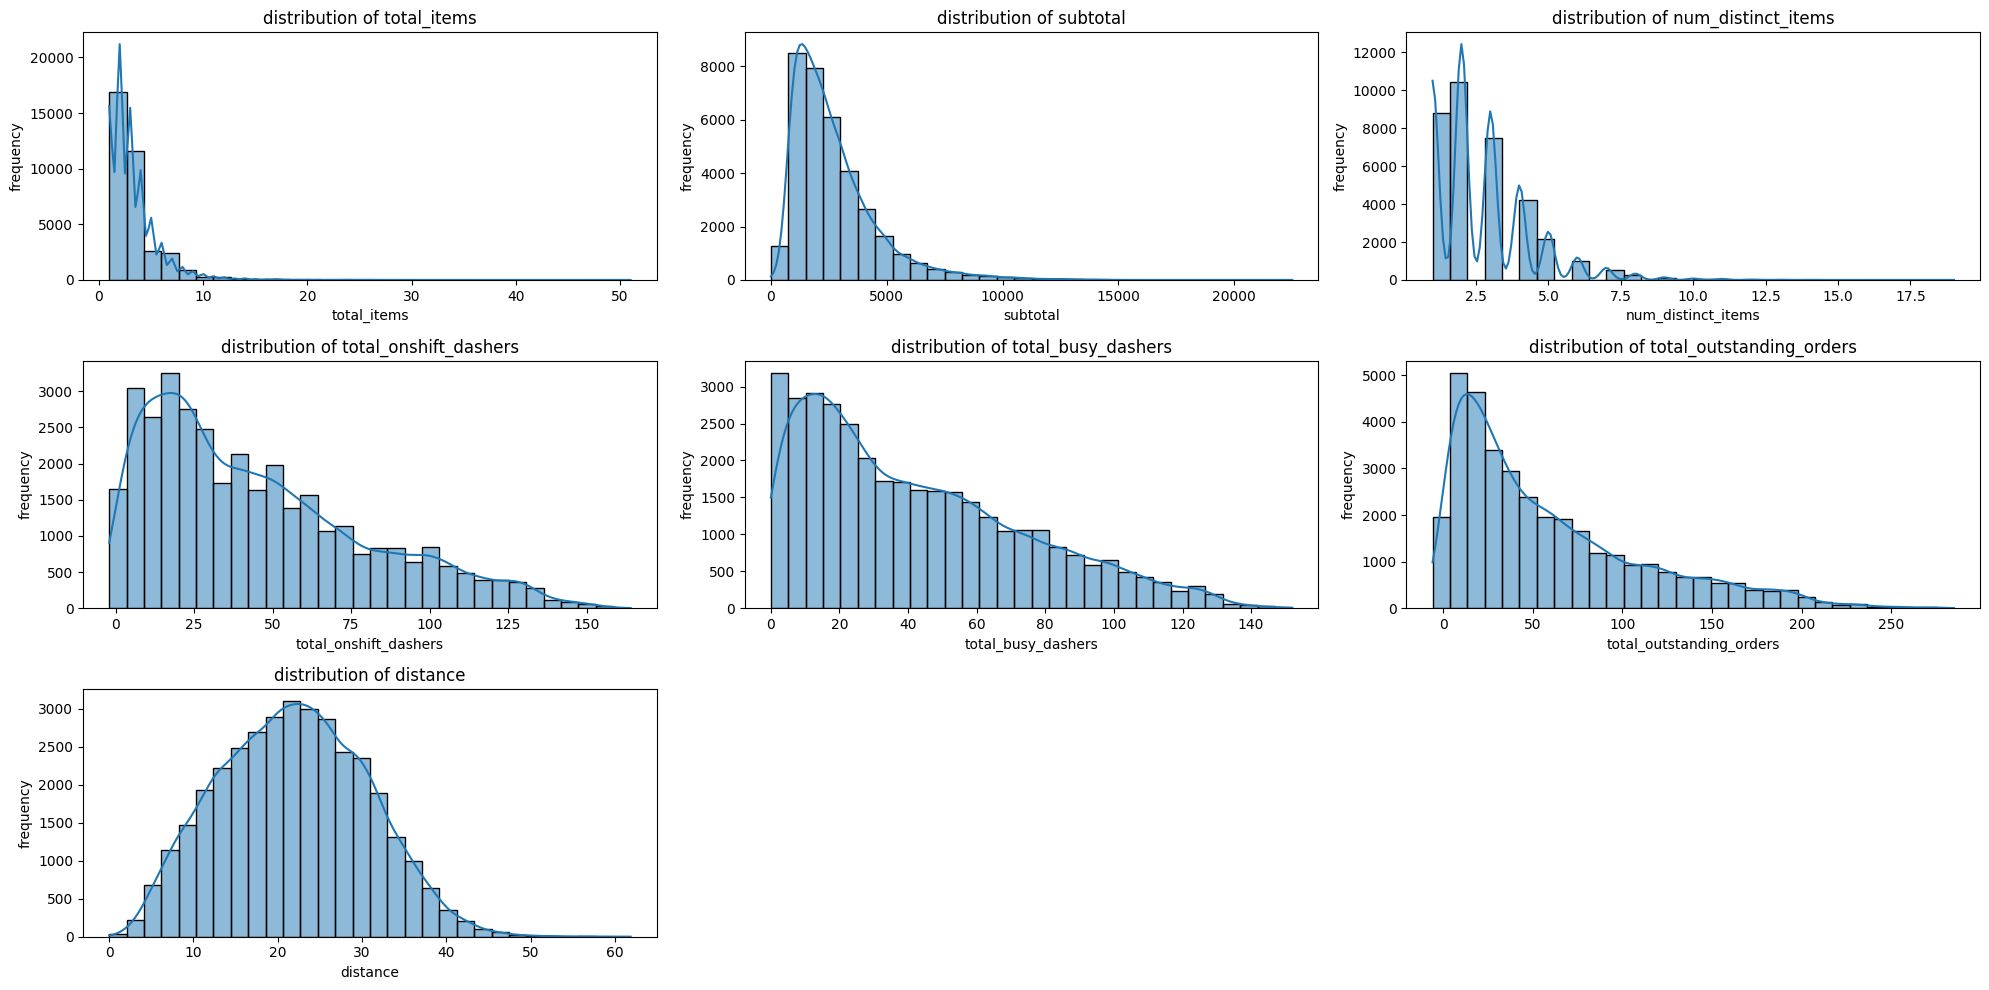

In [66]:
# Plot distributions for all numerical columns

plt.figure(figsize = (20,10))
for i, col in enumerate(num_var, 1):
    plt.subplot(3,3,i)
    sns.histplot(X_test[col], kde = True, bins = 30)
    plt.title(f'distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()

##### **4.1.2**
Check the distribution of categorical features

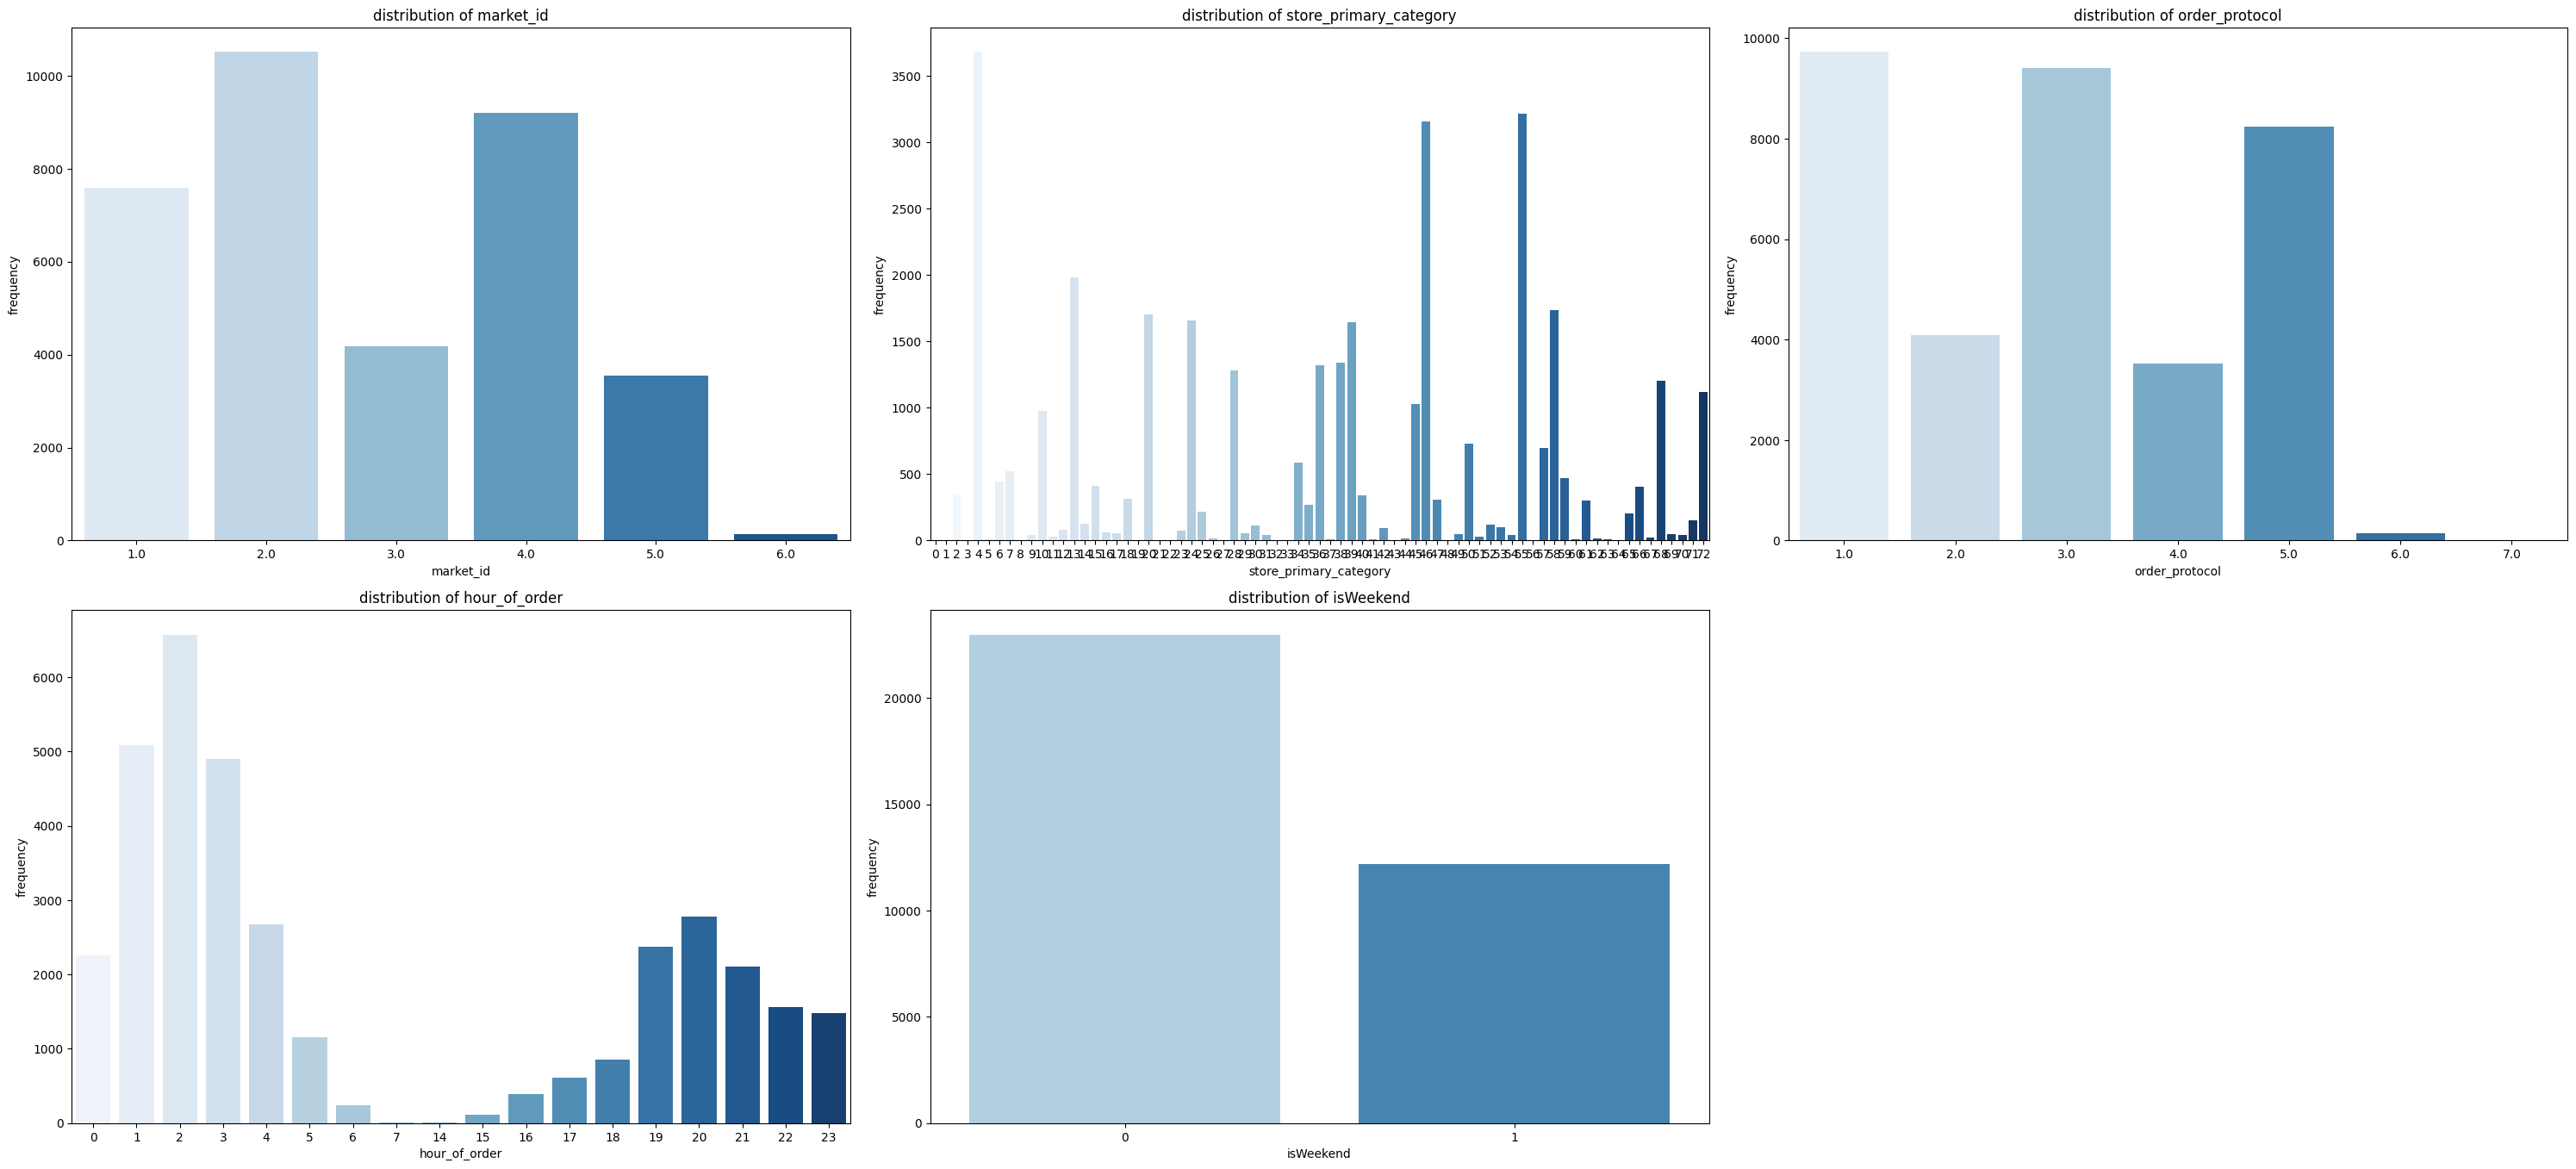

In [68]:
# Distribution of categorical columns

# similar to train data
# using countplot instead of hist plot in cat variables gives better picture

plt.figure(figsize = (30,20))
for i, col in enumerate(cat_var, 1):
    plt.subplot(3,3,i)
    sns.countplot(data=X_test, x=col, palette='Blues')
    plt.title(f'distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
plt.tight_layout()
plt.show()

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

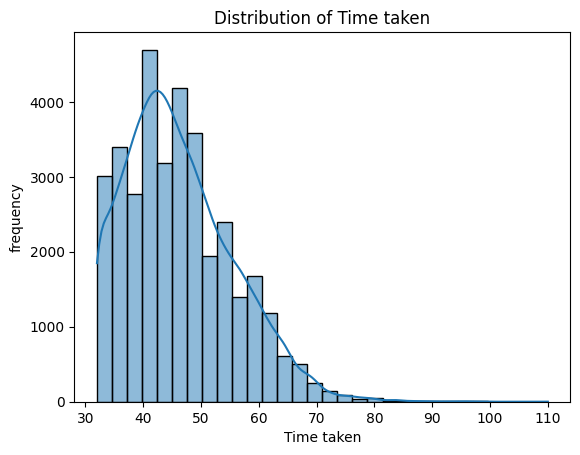

In [70]:
# Distribution of time_taken

sns.histplot(y_test, kde = True, bins = 30)
plt.title('Distribution of Time taken')
plt.xlabel('Time taken')
plt.ylabel('frequency')
plt.show()

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

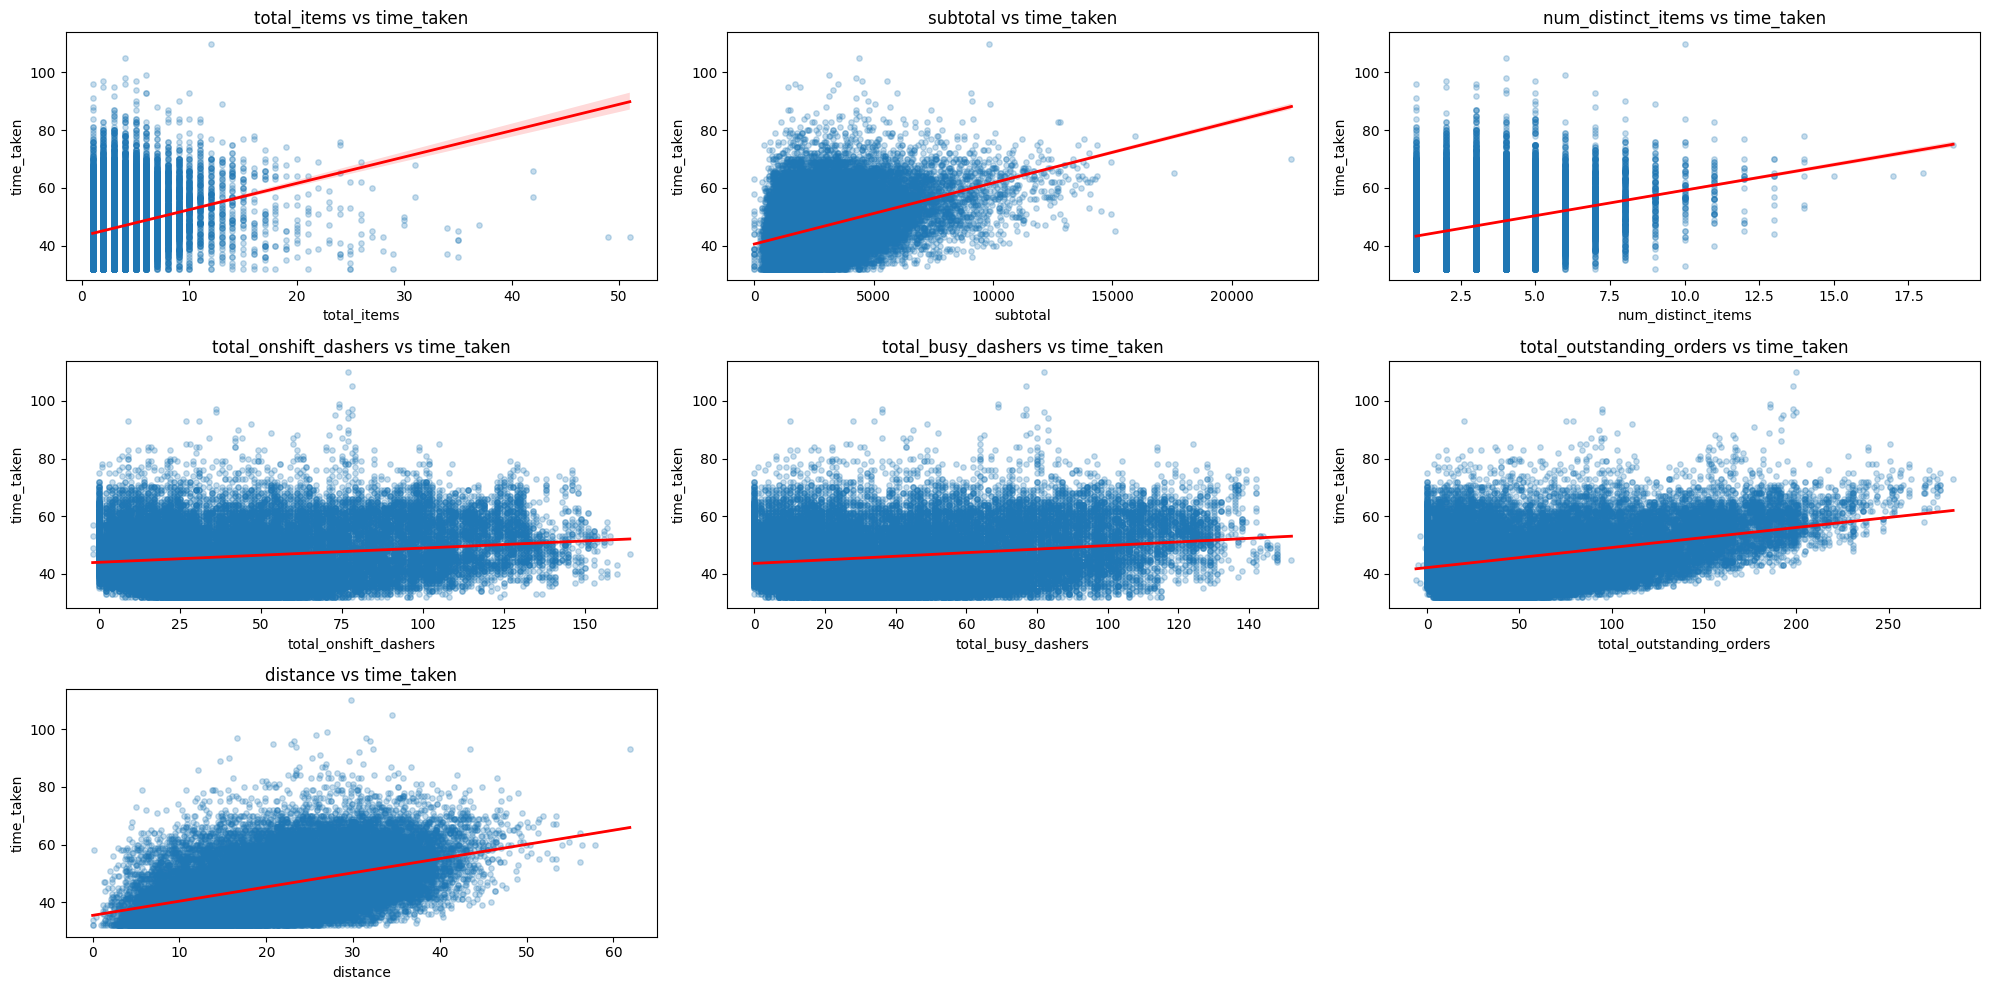

In [72]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize = (20,10))
for i, col in enumerate(num_var, 1):
    plt.subplot(3,3,i)
    # sns.scatterplot(x = X_test[col],y = y_test)
    sns.regplot(x = X_test[col], y = y_test, scatter_kws = {'alpha': 0.25, 's': 15},
               line_kws={'color': 'red', 'linewidth': 2})
    plt.title(f'{col} vs time_taken')
    plt.xlabel(col)
    plt.ylabel('time_taken')
plt.tight_layout()
plt.show()

#### **4.3** Drop the columns with weak correlations with the target variable

In [74]:
# doing 2 steps here 1- dropping weak corr columns 2.outlier capping as done on training data
# Drop the weakly correlated columns from training dataset

X_test = X_test.drop(columns = weak_col)

# using cap from training data only as test data should remain unseen- so no data leakage

for col, upper in upper_cap.items():
    X_test[col] = X_test[col].clip(upper=upper)
X_test.describe()

total_items      subtotal  num_distinct_items  total_onshift_dashers  \
count  35156.000000  35156.000000        35156.000000           35156.000000   
mean       3.155166   2681.405114            2.664922              44.730089   
std        2.157123   1749.042267            1.560160              34.283463   
min        1.000000      0.000000            1.000000              -2.000000   
25%        2.000000   1404.000000            1.000000              17.000000   
50%        3.000000   2238.000000            2.000000              37.000000   
75%        4.000000   3415.000000            3.000000              65.000000   
max       12.000000   9489.200000            8.000000             136.000000   

       total_busy_dashers  total_outstanding_orders      distance  \
count        35156.000000              35156.000000  35156.000000   
mean            41.829446                 58.016868     21.850121   
std             32.097912                 52.274561      8.654638   
min              0.000000                 -6.000000      0.000000   
25%             15.000000                 17.000000     15.360000   
50%             34.000000                 41.000000     21.840000   
75%             63.000000                 85.000000     28.160000   
max            126.000000                213.000000     41.840000   

       hour_of_order  
count   35156.000000  
mean        8.473746  
std         8.676612  
min         0.000000  
25%         2.000000  
50%         3.000000  
75%        19.000000  
max        23.000000

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [77]:
# Import libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [79]:
scaler = MinMaxScaler()

In [80]:
# categorical feature to num
angle_train = 2 * np.pi * X_train['hour_of_order'] / 24
X_train['hour_sin'] = np.sin(angle_train)
X_train['hour_cos'] = np.cos(angle_train)


X_train.drop(columns=['hour_of_order'], inplace=True)
X_train.head()

total_items  subtotal  num_distinct_items  total_onshift_dashers  \
42111             1    1350.0                   1                   23.0   
58452             5    4285.0                   5                  112.0   
20644             6    7880.0                   3                   80.0   
79735             3    3660.0                   3                  127.0   
167933            5    8575.0                   5                   44.0   

        total_busy_dashers  total_outstanding_orders  distance isWeekend  \
42111                 20.0                      19.0      9.60         0   
58452                100.0                     207.0     34.56         1   
20644                 79.0                     115.0     34.92         0   
79735                106.0                     173.0     25.76         1   
167933                44.0                      61.0     17.72         0   

        hour_sin  hour_cos  
42111  -0.866025  0.500000  
58452   0.500000  0.866025  
20644   0.707107  0.707107  
79735   0.500000  0.866025  
167933  0.500000  0.866025

In [81]:
num_var.extend(['hour_sin','hour_cos'])

In [82]:
# Apply scaling to the numerical columns
# using MinMaxScaler for scaling num var

X_train[num_var] = scaler.fit_transform(X_train[num_var])
X_train.head()

total_items  subtotal  num_distinct_items  total_onshift_dashers  \
42111      0.000000  0.142267            0.000000               0.192857   
58452      0.363636  0.451566            0.571429               0.828571   
20644      0.454545  0.830418            0.285714               0.600000   
79735      0.181818  0.385702            0.285714               0.935714   
167933     0.363636  0.903659            0.571429               0.342857   

        total_busy_dashers  total_outstanding_orders  distance isWeekend  \
42111             0.190840                  0.114155  0.229446         0   
58452             0.801527                  0.972603  0.826004         1   
20644             0.641221                  0.552511  0.834608         0   
79735             0.847328                  0.817352  0.615679         1   
167933            0.374046                  0.305936  0.423518         0   

        hour_sin  hour_cos  
42111   0.066987  0.732051  
58452   0.750000  0.928203  
20644   0.853553  0.843039  
79735   0.750000  0.928203  
167933  0.750000  0.928203

In [83]:
X_train.describe()

total_items       subtotal  num_distinct_items  \
count  140621.000000  140621.000000       140621.000000   
mean        0.195390       0.282382            0.236706   
std         0.195635       0.184308            0.221763   
min         0.000000       0.000000            0.000000   
25%         0.090909       0.149117            0.000000   
50%         0.181818       0.233950            0.142857   
75%         0.272727       0.359040            0.285714   
max         1.000000       1.000000            1.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          140621.000000       140621.000000             140621.000000   
mean                0.349043            0.357192                  0.292314   
std                 0.245196            0.244045                  0.237290   
min                 0.000000            0.000000                  0.000000   
25%                 0.150000            0.152672                  0.105023   
50%                 0.292857            0.305344                  0.214612   
75%                 0.500000            0.511450                  0.415525   
max                 1.000000            1.000000                  1.000000   

            distance       hour_sin       hour_cos  
count  140621.000000  140621.000000  140621.000000  
mean        0.521096       0.534290       0.826150  
std         0.207185       0.329134       0.174115  
min         0.000000       0.000000       0.000000  
25%         0.366157       0.146447       0.732051  
50%         0.520076       0.629410       0.843039  
75%         0.672084       0.853553       0.981740  
max         1.000000       1.000000       1.000000

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [87]:
# preparing test data set

In [88]:
# 
angle_test = 2 * np.pi * X_test['hour_of_order'] / 24
X_test['hour_sin'] = np.sin(angle_test)
X_test['hour_cos'] = np.cos(angle_test)
X_test.drop(columns='hour_of_order', inplace=True)


In [89]:
X_test[num_var] = scaler.transform(X_test[num_var])
X_test.head()

total_items  subtotal  num_distinct_items  total_onshift_dashers  \
139667     0.181818  0.136471            0.142857               0.450000   
80077      0.090909  0.310880            0.000000               0.157143   
41872      0.000000  0.147009            0.000000               0.228571   
165269     0.090909  0.312671            0.142857               0.914286   
151215     0.181818  0.131729            0.142857               0.307143   

        total_busy_dashers  total_outstanding_orders  distance isWeekend  \
139667            0.488550                  0.305936  0.491396         0   
80077             0.167939                  0.100457  0.306883         1   
41872             0.244275                  0.232877  0.401530         0   
165269            1.000000                  0.940639  0.454111         1   
151215            0.267176                  0.178082  0.638623         1   

        hour_sin  hour_cos  
139667  0.853553  0.843039  
80077   0.629410  0.981740  
41872   0.853553  0.843039  
165269  0.853553  0.843039  
151215  0.250000  0.928203

In [90]:
# Create/Initialise the model

lr = LinearRegression()


In [91]:
# Train the model using the training data

lr = lr.fit(X_train, y_train)

In [92]:
# Make predictions

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


In [93]:
# results for evaluation metrics

print("Train MAE :", mean_absolute_error(y_train, y_train_pred))
print("Test  MAE :", mean_absolute_error(y_test,  y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train,  y_train_pred)))
print("Test  RMSE:", np.sqrt(mean_squared_error(y_test,  y_test_pred)))
print("Train R²  :", r2_score(y_train, y_train_pred))
print("Test  R²  :", r2_score(y_test,  y_test_pred))

Train MAE : 2.7004286369664414
Test  MAE : 2.68001401992764
Train RMSE: 3.6632534408015904
Test  RMSE: 3.641612281297511
Train R²  : 0.8456307709518166
Test  R²  : 0.8480501376837216


In [94]:
# getting adjusted r sq for better evaluation

def adj_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

n_train, p = X_train.shape
n_test      = X_test.shape[0]

r2_train = r2_score(y_train, y_train_pred)
r2_test  = r2_score(y_test,  y_test_pred)

print(f"Train Adj R²: {adj_r2(r2_train, n_train, p):.3f}")
print(f"Test  Adj R²: {adj_r2(r2_test,  n_test,  p):.3f}")

Train Adj R²: 0.846
Test  Adj R²: 0.848


In [95]:
# Trying to see imp values using statsmodels

X_train_sm = sm.add_constant(X_train)
ols = sm.OLS(y_train, X_train_sm).fit()

print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                 7.703e+04
Date:                Thu, 15 May 2025   Prob (F-statistic):               0.00
Time:                        12:26:04   Log-Likelihood:            -3.8211e+05
No. Observations:              140621   AIC:                         7.642e+05
Df Residuals:                  140610   BIC:                         7.643e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [99]:
# Loop through the number of features and test the model

results = []

# Total number of features
n_total = X_train.shape[1]

# selecting 7 features
for k in range(n_total, 6, -1):  
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=k)
    rfe.fit(X_train, y_train)
    
    selected_features = X_train.columns[rfe.support_]
    
    # Train model
    model = LinearRegression()
    model.fit(X_train[selected_features], y_train)
    
    # Predict and evaluate
    y_pred = model.predict(X_test[selected_features])
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    
    results.append((k, list(selected_features), r2, rmse))

# Print results
for k, features, r2, rmse in results:
    print(f"{k} features | R² = {r2:.4f} | RMSE = {rmse:.2f} | Features: {features}")


10 features | R² = 0.8481 | RMSE = 13.26 | Features: ['total_items', 'subtotal', 'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'isWeekend', 'hour_sin', 'hour_cos']
9 features | R² = 0.8438 | RMSE = 13.63 | Features: ['total_items', 'subtotal', 'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour_sin', 'hour_cos']
8 features | R² = 0.8434 | RMSE = 13.67 | Features: ['subtotal', 'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour_sin', 'hour_cos']
7 features | R² = 0.8416 | RMSE = 13.82 | Features: ['subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour_sin', 'hour_cos']


In [100]:
# Build the final model with selected number of features

final_col = ['subtotal','total_onshift_dashers','total_busy_dashers','total_outstanding_orders','distance','hour_sin','hour_cos']
X_train_final = X_train[final_col]
X_test_final = X_test[final_col]

fm = LinearRegression()

fm = fm.fit(X_train_final, y_train)

y_train_pred = fm.predict(X_train_final)
y_test_pred = fm.predict(X_test_final)

# results for evaluation metrics

print("Train MAE :", mean_absolute_error(y_train, y_train_pred))
print("Test  MAE :", mean_absolute_error(y_test,  y_test_pred))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test  RMSE:", np.sqrt(mean_squared_error(y_test,  y_test_pred)))
print("Train R²  :", r2_score(y_train, y_train_pred))
print("Test  R²  :", r2_score(y_test,  y_test_pred))

Train MAE : 2.787645938650665
Test  MAE : 2.7717412421547145
Train RMSE: 3.7336011997359
Test  RMSE: 3.7176200725582276
Train R²  : 0.8396449440503757
Test  R²  : 0.8416409420465836


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

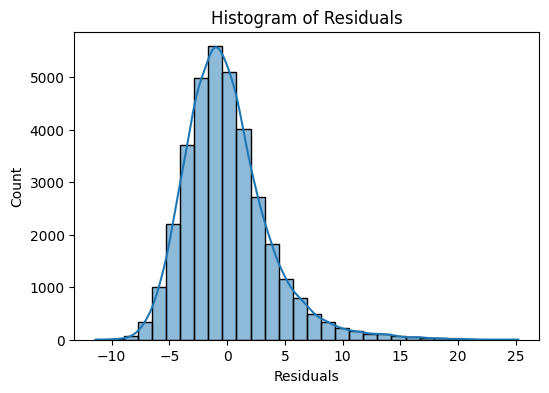

In [103]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

residuals = y_test - y_test_pred

# residuals histogram

plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.show()


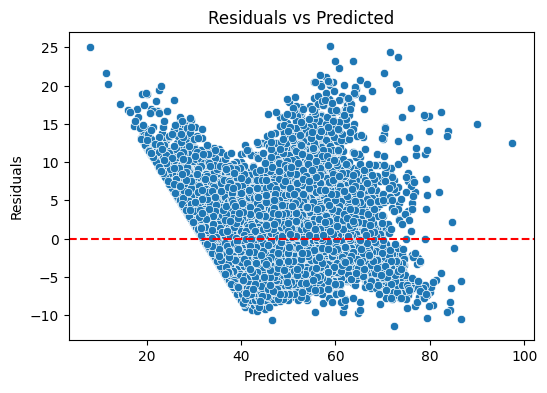

In [104]:
# residuals vs predicted value

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


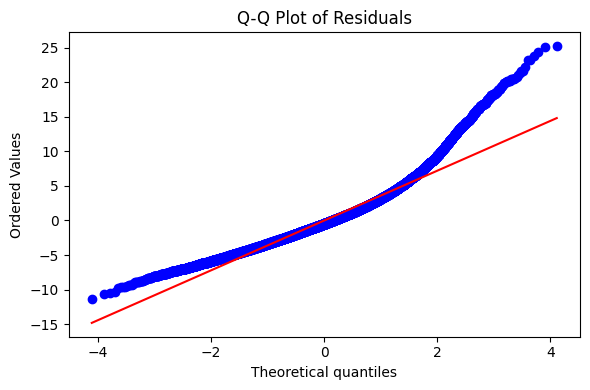

In [105]:
import scipy.stats as stats

plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()


In [106]:
# this step was not required as per assignment hence checking this here just to chk if there is multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = X_train_final.columns
vif['VIF'] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
vif = round(vif.sort_values(by = 'VIF', ascending = False),2)
print(vif)

                    Feature    VIF
1     total_onshift_dashers  37.63
2        total_busy_dashers  36.07
3  total_outstanding_orders  26.36
6                  hour_cos  11.92
4                  distance   6.03
5                  hour_sin   4.65
0                  subtotal   3.42


[Your inferences here: 

The final linear regression model, built using 7 key features, is able to explain about 84% of the variation in delivery times and keeps the MAE around 2.8 min. The error is also stable across both training and test data, which means the model is reliable and not overfitting.

While reviewing the model, I found a high VIF between some dasher-related features, like total dashers on shift and those already busy. These features are highly multicollinear, which doesn’t affect the overall prediction accuracy but makes it harder to interpret the individual importance of each feature.

Overall, the model is well-suited for predicting delivery times in real-world operations and gives dependable results.
]


### Performing additional steps for my own understanding

In [109]:
# Split data into training and testing sets

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, train_size = .8, test_size = .2, random_state = 100)


In [110]:
# Handle outliers
col_outlier1 = (['total_items','subtotal','num_distinct_items','total_onshift_dashers','total_busy_dashers',
               'total_outstanding_orders','distance'])

upper_cap1 = {col: X_train1[col].quantile(.99) for col in col_outlier1}

for col, upper in upper_cap1.items():
    X_train1[col] = X_train1[col].clip(upper=upper)
    X_test1[col] = X_test1[col].clip(upper=upper)


In [111]:
# Define numerical and categorical columns for easy EDA and data manipulation

cat_var1 = ['order_protocol','hour_of_order','isWeekend']
num_var1 = ['total_items','subtotal','num_distinct_items','total_busy_dashers','total_outstanding_orders','distance']


In [112]:
# using MinMaxScaler for scaling num var

X_train1[num_var1] = scaler.fit_transform(X_train1[num_var1])
X_test1[num_var1] = scaler.transform(X_test1[num_var1])

In [113]:
X_train1.drop(columns = ['market_id','store_primary_category'], axis = 1, inplace = True)
X_test1.drop(columns = ['market_id','store_primary_category'], axis = 1, inplace = True)

In [114]:
# lets not use RFE here and choose the 7 columns as per my own understanding

X_train_sm1 = sm.add_constant(X_train1)
ols = sm.OLS(y_train1, X_train_sm1).fit()

print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 9.529e+04
Date:                Thu, 15 May 2025   Prob (F-statistic):               0.00
Time:                        12:26:06   Log-Likelihood:            -3.6926e+05
No. Observations:              140621   AIC:                         7.385e+05
Df Residuals:                  140610   BIC:                         7.386e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [115]:
vif1 = pd.DataFrame()
vif1['Feature'] = X_train1.columns
vif1['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif1 = round(vif1.sort_values(by = 'VIF', ascending = False),2)
print(vif1)

                    Feature    VIF
5        total_busy_dashers  35.89
4     total_onshift_dashers  33.51
6  total_outstanding_orders  25.98
3        num_distinct_items   9.84
1               total_items   8.67
2                  subtotal   6.09
7                  distance   4.87
0            order_protocol   4.02
8             hour_of_order   1.98
9                 isWeekend   1.54


In [116]:
# dropping column total_busy_dashers with highest vif
X_train1.drop(columns = ['total_busy_dashers'], axis = 1, inplace = True)

In [117]:
X_train_sm1 = sm.add_constant(X_train1)
ols = sm.OLS(y_train1, X_train_sm1).fit()

print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 8.906e+04
Date:                Thu, 15 May 2025   Prob (F-statistic):               0.00
Time:                        12:26:06   Log-Likelihood:            -3.7973e+05
No. Observations:              140621   AIC:                         7.595e+05
Df Residuals:                  140611   BIC:                         7.596e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [118]:
vif1 = pd.DataFrame()
vif1['Feature'] = X_train1.columns
vif1['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif1 = round(vif1.sort_values(by = 'VIF', ascending = False),2)
print(vif1)

                    Feature    VIF
4     total_onshift_dashers  22.94
5  total_outstanding_orders  21.39
3        num_distinct_items   9.84
1               total_items   8.67
2                  subtotal   6.07
6                  distance   4.80
0            order_protocol   3.97
7             hour_of_order   1.97
8                 isWeekend   1.54


In [119]:
# dropping column num_distinct_items with highest vif
X_train1.drop(columns = ['num_distinct_items'], axis = 1, inplace = True)

In [120]:
X_train_sm1 = sm.add_constant(X_train1)
ols = sm.OLS(y_train1, X_train_sm1).fit()

print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 9.904e+04
Date:                Thu, 15 May 2025   Prob (F-statistic):               0.00
Time:                        12:26:07   Log-Likelihood:            -3.8043e+05
No. Observations:              140621   AIC:                         7.609e+05
Df Residuals:                  140612   BIC:                         7.610e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [121]:

vif1 = pd.DataFrame()
vif1['Feature'] = X_train1.columns
vif1['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif1 = round(vif1.sort_values(by = 'VIF', ascending = False),2)
print(vif1)

                    Feature    VIF
3     total_onshift_dashers  22.94
4  total_outstanding_orders  21.39
2                  subtotal   5.52
5                  distance   4.80
0            order_protocol   3.96
1               total_items   3.50
6             hour_of_order   1.96
7                 isWeekend   1.54


In [122]:
# dropping column num_distinct_items with highest vif
# X_train1.drop(columns = ['num_distinct_items'], axis = 1, inplace = True)

# X_train_sm1 = sm.add_constant(X_train1)
# ols = sm.OLS(y_train1, X_train_sm1).fit()

# print(ols.summary())

# vif1 = pd.DataFrame()
# vif1['Feature'] = X_train1.columns
# vif1['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
# vif1 = round(vif1.sort_values(by = 'VIF', ascending = False),2)
# print(vif1)

# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------
# so now if i am trying to remove any high vif column out of these 2 then R^2 is comeing to around 50%,
# so maybe considering these two will be better approch
# ---------------------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------------------

In [123]:
X_test1.drop(columns = ['num_distinct_items','total_busy_dashers'], axis = 1, inplace = True)

In [124]:
# using sklearn

fm1 = LinearRegression()

fm1 = fm1.fit(X_train1, y_train1)

y_train_pred1 = fm1.predict(X_train1)
y_test_pred1 = fm1.predict(X_test1)

# results for evaluation metrics

print("Train MAE :", mean_absolute_error(y_train1, y_train_pred1))
print("Test  MAE :", mean_absolute_error(y_test1,  y_test_pred1))
print("Train RMSE:", np.sqrt(mean_squared_error(y_train1, y_train_pred1)))
print("Test  RMSE:", np.sqrt(mean_squared_error(y_test1,  y_test_pred1)))
print("Train R²  :", r2_score(y_train1, y_train_pred1))
print("Test  R²  :", r2_score(y_test1,  y_test_pred1))

Train MAE : 2.5960279333981275
Test  MAE : 2.5789372534255977
Train RMSE: 3.6197177419409736
Test  RMSE: 3.5820560753911255
Train R²  : 0.8492781501319167
Test  R²  : 0.8529795792472578


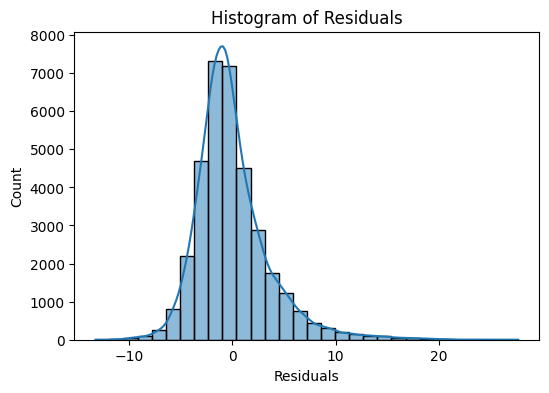

In [125]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

y_train_pred1 = fm1.predict(X_train1)
y_test_pred1 = fm1.predict(X_test1)


residuals1 = y_test1 - y_test_pred1

# residuals histogram

plt.figure(figsize=(6, 4))
sns.histplot(residuals1, kde=True, bins=30)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.show()


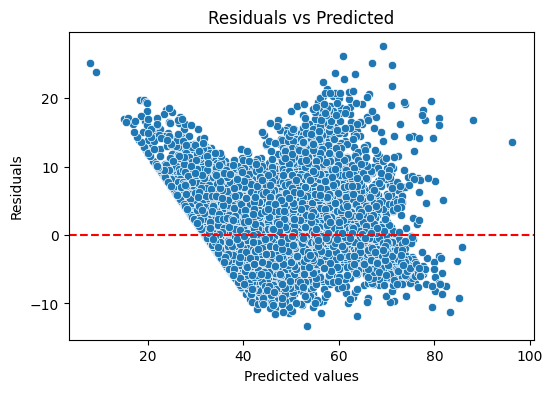

In [126]:
# residuals vs predicted value

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_pred1, y=residuals1)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


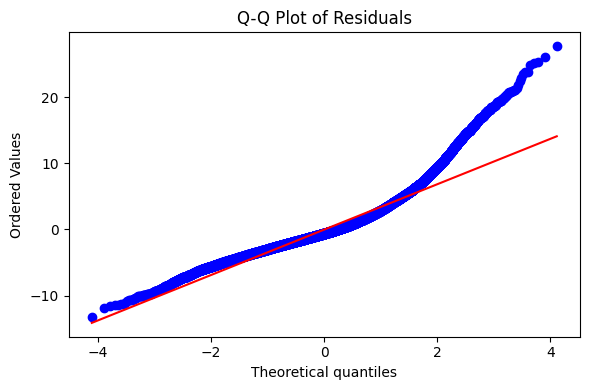

In [127]:
plt.figure(figsize=(6, 4))
stats.probplot(residuals1, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.tight_layout()
plt.show()


#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [130]:
# Compare the scaled vs unscaled features used in the final model

# scaled coefficients 
coef = pd.Series(ols.params).drop('const')

scaled_features = ['total_items', 'subtotal', 'total_onshift_dashers', 'total_outstanding_orders', 'distance']

# range for scaled features
range_diff = X[scaled_features].agg(['min', 'max']).T
range_diff['range'] = range_diff['max'] - range_diff['min']

# unscaled impact
unscaled_impact = coef[scaled_features] * range_diff['range']

final_df = pd.DataFrame({'Feature': coef.index, 'Scaled Coef': coef.values})

# range and unscaled impact
final_df['Range'] = final_df['Feature'].map(range_diff['range'].round(2))
final_df['Unscaled Impact'] = final_df['Feature'].map(unscaled_impact.round(2))

final_df

Feature  Scaled Coef     Range  Unscaled Impact
0            order_protocol    -0.715709       NaN              NaN
1               total_items     1.665333    410.00           682.79
2                  subtotal    15.198113  26800.00        407309.42
3     total_onshift_dashers    -0.453631    175.00           -79.39
4  total_outstanding_orders    71.091530    291.00         20687.64
5                  distance    19.989915     83.52          1669.56
6             hour_of_order    -0.256374       NaN              NaN
7                 isWeekend     1.183844       NaN              NaN

Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [132]:
# Analyze the effect of a unit change in a feature, say 'total_items'

fdf = final_df[~final_df['Range'].isna()]

# unit change impact
fdf['Unit_change_impact'] = (fdf['Scaled Coef'] / fdf['Range']).round(4)

fdf[['Feature', 'Scaled Coef', 'Range', 'Unit_change_impact']]


Feature  Scaled Coef     Range  Unit_change_impact
1               total_items     1.665333    410.00              0.0041
2                  subtotal    15.198113  26800.00              0.0006
3     total_onshift_dashers    -0.453631    175.00             -0.0026
4  total_outstanding_orders    71.091530    291.00              0.2443
5                  distance    19.989915     83.52              0.2393

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> Yes, the dataset(final manually/VIF based) includes 3 categorical variables.
>1. order_protocol which has negative coef of -0.7, meaning higher protocol values reduce delivery time.
>2. hours_of_order, also has negative coef of -0.26 delivery time reduced in the later hours of the day.
>3. is_weekend has the positive coef of 1.18, meaning generally takes loger delivery time than weekdays.




---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> test_size = 0.2 means that when splitting the data into training and test sets, 20% of the total data is allocated to the test set and the remaining 80% goes to the training set.

>For example, if there are 100 data points in the dataset, setting test_size = 0.2 will result in 80 data points in the training set and 20 data points in the test set. 



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>From the heatmap, we can see that the feature distance has the highest correlation with the target variable (delivery time), with a correlation coefficient of 0.46. This positive correlation suggests that as the distance increases, the delivery time tends to increase as well.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>To detect outliers, I used boxplots to visualize the distribution of features and identify extreme values that could skew the model. (outside the interquartile range or beyond the whiskers of the boxplot).

>To address the outliers, I applied capping at the 99th percentile. This means I replaced any values above the 99th percentile with the value at the 99th percentile, ensuring that the model wasn't affected by extreme outliers.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>total_outstanding_orders has the largest coefficient 71.09, meaning that increasing the number of outstanding orders has a strong impact on delivery time.

>distance is the next most influential feature with a coefficient of 19.99, indicating that delivery time increases with greater distances.

>subtotal is also important with a coefficient of 15.20, meaning higher order amounts result in longer delivery times.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
- Linear regression is a statistical method used in supervised learning to predict an outcome based on known past data.
- It is used to model the relationship between a dependent variable and one or more independent variables. The goal is to fit a line in simple linear regression or a hyperplane in multiple linear regression that best describes the relationship and allows us to predict future values.

1. Simple Linear Regression:

>We use this when we want to predict something based on just one factor.

>We assume a linear relationship between the factor house size and the price.

>Formula is -> y = b0 + b1x1

2. Multiple Linear Regression:

>We use this when we want to predict an outcome based on several factors.

>Here also we assume that the relationship between all these factors and the price is linear.

>Formula for this is -> y = b0 + b1x1 +b2x2 +........+ bnxn

1. where y is dependent variable.
2. x1,x2,x3......xn are independent variables
3. b0 is constant/ intercept
4. b1,b2.......bn are the coefficients.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>The key difference between simple linear regression and multiple linear regression is the number of predictor variables:

>Simple Linear Regression:
1. Involves one independent variable to predict the target variable.
2. The relationship is modeled as a straight line.

Ex: Predicting house prices based on the size of the house.

>Multiple Linear Regression:
1. Involves more than one independent variable to predict the target variable.
2. The relationship is modeled as a hyperplane in a multi-dimensional space.

Ex: Predicting house prices based on multiple factors like size, location, and number of rooms.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>Cost function, also called as loss function is a mathematical function to find the error or difference between predicted values and actual values in linear regression.

>The most commonly used cost function in linear regression is the Residual Sum of Squares (RSS) or Mean Squared Error (MSE), which calculates the squared differences between the predicted and actual values.

To minimize the cost function, we use optimization techniques.
> The most common method is Gradient Descent, which works by iteratively updating the model's coefficients in the direction that reduces the cost function.

>Alternative method is Ordinary Least Squares (OLS), which is used to estimate the coefficients of a linear regression model.



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting occurs when a model becomes too complex by including too many variables or parameters, leading it to memorize the training data, including its noise. This results in high training accuracy but low test accuracy because the model fails to generalize to new data.

>On the other hand, underfitting happens when the model is too simple and cannot capture the underlying patterns in the data. It leads to low performance on both the training and test data.




---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>There are several key assumptions in linear regression, and residual plots can help validate or detect violations of these assumptions.

Residuals vs Predicted Values (for Homoscedasticity):

>This plot checks if residuals have constant variance. A random scatter around the horizontal axis indicates that the assumption holds. A funnel shape, however, suggests heteroscedasticity (non-constant variance), which violates the assumption. This pattern is observed in our model.

Histogram or Q-Q Plot (for Normality of Residuals):
>A histogram of residuals shows if they follow a bell-shaped curve (normal distribution). A Q-Q plot compares residuals to a normal distribution; if the points lie on a straight line, the residuals are normal. In our case, the histogram and Q-Q plot show deviations from normality, indicating a slight skew in the residuals.

Residuals vs Predicted Values (for Linearity):
>same plot helps check the linearity assumption. If there's no clear pattern in the residuals, the linearity assumption holds. If residuals form a curve, it suggests that the relationship between predictors and the target is not linear. This is evident in our plot, where we observe a clear pattern, indicating potential non-linearity.